In [16]:
from IPython.display import Image

### Tarefas

- Introducción: Descrever por encima o projeto
- Modelagem do problema
 - Descrever o map.py (Que é #, espaço etc) Imagen dos mapas. (Mapas com pontos e sem)
- O como funçõa cada estrategia (Copiar e colar función codigo) (BFS, DFS, A*1, A*2, LBS, HILL). 
    - Descrever por cima. 
    - Limitaçoes da estrategia
- How to execute?
- Resultados 
- Conclución


# Astar Estrategy (A*)

This solution employs the best first graph search or greedy search, thus the node expansions are giving by lowest scores first policy.

This policy sort the nodes employ a mechanism that minimizes the function f(n).
For example, the breadth-first search occurs when f(n)=node.depth. 

Moreover, the function f(n) "memorize" the nodes previously computed, in order to examine the f values and recover the path. 


The followig code show the implementation of the best first graph search:

In [10]:
def best_first_graph_search(problem, f, display=False):
    # Nodes in cache
    f = memoize(f, 'f') 
    node = Node(problem.initial)
    # Priority queue giving by the lowest score in f(n)=g(n)+h(n)
    frontier = PriorityQueue('min', f)
    # Initial node
    frontier.append(node)
    explored = set()
    # While node goal different goal state
    while frontier:
        node = frontier.pop()
        # If node goal equal node state, return node
        if problem.goal_test(node.state):
            if display:
                print(len(explored), "paths have been expanded and", len(frontier), "paths remain in the frontier")
            return node
        # else, add node to the priority queue
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
            elif child in frontier:
                if f(child) < frontier[child]:
                    del frontier[child]
                    frontier.append(child)
    return None

def Astar(problem, display=False):
    h = None
    h = memoize(h or problem.h, 'h')
    fn = n.path_cost + h(n)
    
    return best_first_graph_search(problem, lambda n: fn, display)
   

The astar strategy tries to expand the **node**, which is closest to the goal, and also it considers the cost to reach that **node**. This expansion policy means that the f fucntions depends on two values.

Thus, the evaluation of the nodes is done employing the function f(n):

f(n) = g(n) + h(n)
    - g(n): cost to reach each node
    - h(n): cost to get from the node to the goal
    
In this project, the g(n) is equal to the path cost.

 The path cost of this solution increse in 1 when the state change by an action. 
 
 Thus, the costs is uniform for every step in the path, since all step have the same value.

In [ ]:
   def path_cost(self, c, state1, action, state2):
        return c + 1

Also. the node evaluation is giving by a heuristic h(n), which assumes that the node closest to the goal is the faster solution. 

The following sections show the two heuristics employed in this project.

## Astar One (A*1)

The A*1 heruristic employ euclidean distance, which calcualtes straight line distance in a cartesian map. 

Thus, h1(n) is calculated as:

In [27]:
def h1(self, node):
    return node.state.getDistance()
    
def getDistance(self):
    v = distance.euclidean(self.pos, self.goal)
    return v

The A search is complete and optimal when the function h(n) satisfies the following conditions:

Consistent heuristic: $$h(n) \leq  c(n, a, n') + h(n')$$ 


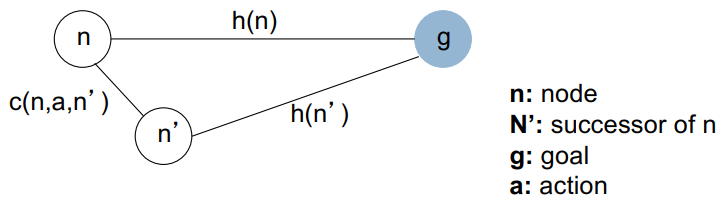

In [21]:
Image("img/consistent.png", width=500, height=300)

In this case, the steps between the actual free space and the goal space never can be longer than the
euclidean distance.

If

 - h(n) = euclidean distance from n to g 
 - h(n') : euclidean distance from n' to g
 - c(n, a, n') = 1

This heuristic wich employ the euclidean distance is a consistent heristic because:

 
In the best case, when the actions to go from n to n' decrese the path in 1 step. We have that the c(n, a, n') + h(n') is equal to h(n).


 
 

## Astar One (A*2)

The A*2 heruristic employ euclidean distance combined with a distance to reach a near point.

Thus, h2(n) is calculated as:

In [ ]:
def h2(self, node):
    return node.state.getDistancePoints()

def getDistancePoints(self):
    points = self.getPointsLeft()
    # print(points)
    dis_Pos_Goal = distance.euclidean(self.pos, self.goal)
    dis_Pos_Point = distance.euclidean(self.pos, self.goal)
    dis_Point_Goal = 0
    valeu = 0
    x = 0.0

    if(len(points)==0):
        valeu =  dis_Pos_Goal
    else:
        for ip in points:
            if distance.euclidean(self.pos, ip) < dis_Pos_Point:
                dis_Pos_Point = distance.euclidean(self.pos, ip)
                dis_Point_Goal = distance.euclidean(ip, self.goal)

        v = 0.5*dis_Pos_Point + dis_Point_Goal
        if dis_Pos_Point == 1:
            v=0
        if(v>0):
            x = dis_Pos_Goal/v
        else:
            x = 1

        valeu = dis_Pos_Goal + dis_Pos_Goal*(1-x)
    return valeu

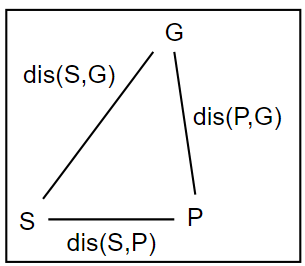

In [26]:
Image("img/h2.png", width=300, height=300)